In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split

In [2]:
# current directory
cwd = os.getcwd()
print(cwd)

c:\Users\Haris Shahzad\Desktop\CV\Covid-19 Detection


In [3]:
# path to images
path = cwd+'/Covid19-dataset/train/'
print(path)

c:\Users\Haris Shahzad\Desktop\CV\Covid-19 Detection/Covid19-dataset/train/


In [4]:
# animal categories
categories = ['Covid', 'Normal', 'Viral Pneumonia']

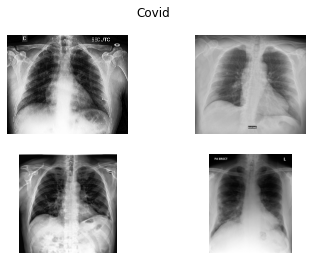

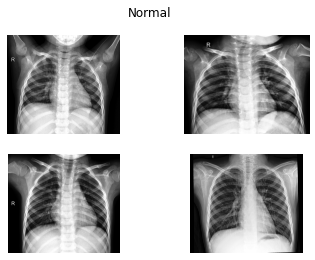

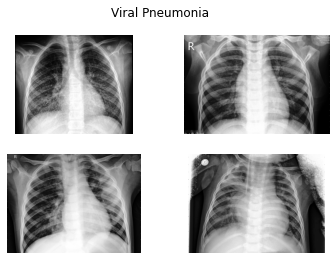

In [5]:
# let's display some of the pictures

for category in categories:
    fig, _ = plt.subplots(2,2)
    fig.suptitle(category)
    fig.patch.set_facecolor('xkcd:white')
    for k, v in enumerate(os.listdir(path+category)[:4]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(2, 2, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()


In [6]:
shape0 = []
shape1 = []

for category in categories:
    for files in os.listdir(path+category):
        shape0.append(plt.imread(path+category+'/'+ files).shape[0])
        shape1.append(plt.imread(path+category+'/'+ files).shape[1])
    print(category, ' => height min : ', min(shape0), 'width min : ', min(shape1))
    print(category, ' => height max : ', max(shape0), 'width max : ', max(shape1))
    shape0 = []
    shape1 = []

Covid  => height min :  341 width min :  416
Covid  => height max :  4095 width max :  4248
Normal  => height min :  1063 width min :  1534
Normal  => height max :  2713 width max :  2752
Viral Pneumonia  => height min :  640 width min :  1056
Viral Pneumonia  => height max :  1456 width max :  2000


In [7]:
# 3. Preprocess data and label inputs

In [8]:
# initialize the data and labels
data = []
labels = []
imagePaths = []
HEIGHT = 32
WIDTH = 55
N_CHANNELS = 3

# grab the image paths and randomly shuffle them
for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) # k=0 : 'dogs', k=1 : 'panda', k=2 : 'cats'

import random
random.shuffle(imagePaths)
print(imagePaths[:10])

# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    data.append(image)
    
    
    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    labels.append(label)
print(np.shape(data))

[['c:\\Users\\Haris Shahzad\\Desktop\\CV\\Covid-19 Detection/Covid19-dataset/train/Covid/04.png', 0], ['c:\\Users\\Haris Shahzad\\Desktop\\CV\\Covid-19 Detection/Covid19-dataset/train/Normal/093.jpeg', 1], ['c:\\Users\\Haris Shahzad\\Desktop\\CV\\Covid-19 Detection/Covid19-dataset/train/Viral Pneumonia/0120.jpeg', 2], ['c:\\Users\\Haris Shahzad\\Desktop\\CV\\Covid-19 Detection/Covid19-dataset/train/Normal/072.jpeg', 1], ['c:\\Users\\Haris Shahzad\\Desktop\\CV\\Covid-19 Detection/Covid19-dataset/train/Viral Pneumonia/082.jpeg', 2], ['c:\\Users\\Haris Shahzad\\Desktop\\CV\\Covid-19 Detection/Covid19-dataset/train/Normal/062.jpeg', 1], ['c:\\Users\\Haris Shahzad\\Desktop\\CV\\Covid-19 Detection/Covid19-dataset/train/Covid/COVID-00002.jpg', 0], ['c:\\Users\\Haris Shahzad\\Desktop\\CV\\Covid-19 Detection/Covid19-dataset/train/Normal/0101.jpeg', 1], ['c:\\Users\\Haris Shahzad\\Desktop\\CV\\Covid-19 Detection/Covid19-dataset/train/Covid/091.jpg', 0], ['c:\\Users\\Haris Shahzad\\Desktop\\CV\\C

In [9]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0

labels = np.array(labels)

In [10]:
print(data.shape, labels.shape)

(312, 32, 55, 3) (312,)


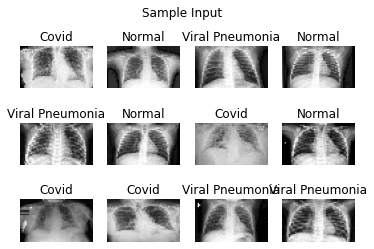

In [11]:
# Let's check everything is ok
fig, _ = plt.subplots(3,4)
fig.suptitle("Sample Input")
fig.patch.set_facecolor('xkcd:white')
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
plt.show()

In [12]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)


In [13]:
# Preprocess class labels


print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(249, 32, 55, 3)
(63, 32, 55, 3)
(249,)
(63,)


In [14]:
trainX= np.reshape(trainX, (trainX.shape[0], -1))
testX = np.reshape(testX, (testX.shape[0], -1))

In [15]:
# Preprocess class labels


print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(249, 5280)
(63, 5280)
(249,)
(63,)


In [16]:
from sklearn import svm
# clf = svm.SVC()
clf = svm.NuSVC()
clf.fit(trainX, trainY)

NuSVC()

In [17]:
# Preprocess class labels

print(testX.shape)
print(testY.shape)

(63, 5280)
(63,)


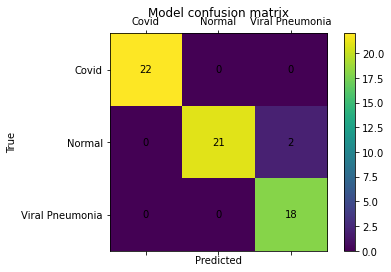

Accuracy : 96.83%


In [18]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = clf.predict(testX)
# print(pred)
# predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, pred)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, pred)
print("Accuracy : %.2f%%" % (accuracy*100.0))

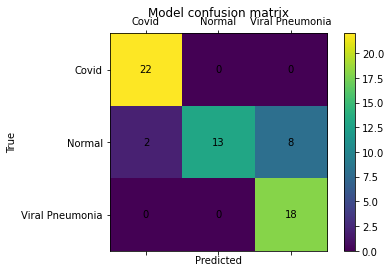

Accuracy : 84.13%


In [19]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=)
neigh.fit(trainX, trainY)
pred = neigh.predict(testX)

cm = confusion_matrix(testY, pred)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, pred)
print("Accuracy : %.2f%%" % (accuracy*100.0))

In [20]:
trainX = trainX.reshape(trainX.shape[0],32, 55, 3)
testX = testX.reshape(testX.shape[0],32, 55, 3)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(249, 32, 55, 3)
(63, 32, 55, 3)
(249,)
(63,)


In [21]:
from skimage.feature import hog
from skimage.color import rgb2gray
ppc = 16
hog_images = []
hog_features = []
for image in trainX:
    
    image = rgb2gray(image)
#    image = data.astronaut()
    


    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                        cells_per_block=(1, 1), visualize=True, multichannel=False)
    hog_features.append(fd)

In [22]:
train_hog=np.array(hog_features)
print(train_hog.shape)

(249, 48)


In [23]:
from sklearn import svm
# clf = svm.SVC()
clf = svm.NuSVC()
clf.fit(train_hog, trainY)

NuSVC()

In [24]:
ppc = 16
hog_images = []
hog_features_t = []
for image in testX:
    
    image = rgb2gray(image)
#    image = data.astronaut()
    

    fd_test, hog_image_test = hog(image, orientations=8, pixels_per_cell=(16, 16),
                        cells_per_block=(1, 1), visualize=True, multichannel=False)
    hog_features_t.append(fd_test)

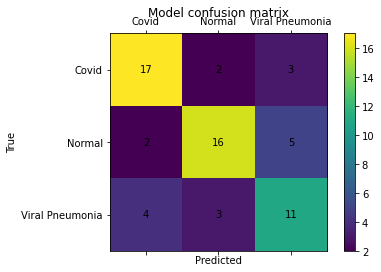

Accuracy : 69.84%


In [25]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = clf.predict(hog_features_t)
# print(pred)
# predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, pred)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, pred)
print("Accuracy : %.2f%%" % (accuracy*100.0))

In [41]:
clf

NuSVC()